In [7]:
using Plots
using StaticArrays
using Optim

In [2]:
push!(LOAD_PATH,"/Users/grs53/code/TestLandscapes.jl/src/")
push!(LOAD_PATH,"/Users/grs53/code/StringMethod.jl/src/")

5-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/Users/grs53/code/TestLandscapes.jl/src/"
 "/Users/grs53/code/StringMethod.jl/src/"

In [3]:
using TestPotentials2D

In [4]:
V = x-> TestPotentials2D.Muller(x)

#1 (generic function with 1 method)

In [15]:
min1 = optimize(V, [-0.75,1.5])
x1 = min1.minimizer

2-element Array{Float64,1}:
 -0.5582223315786567
  1.441727697793157

In [16]:
min2 = optimize(V, [0.6,0.])
x2 = min2.minimizer

2-element Array{Float64,1}:
 0.6235028759609716
 0.028037347734474527

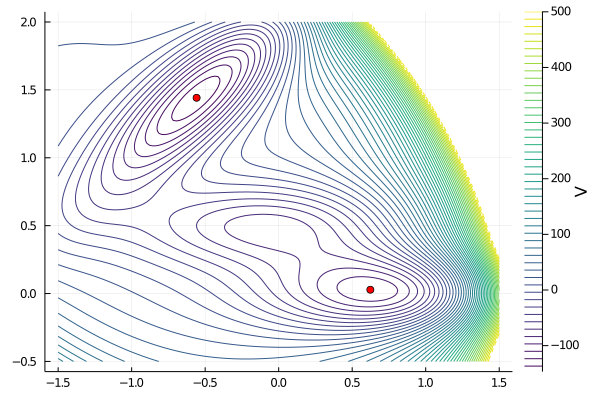

In [20]:
xx =LinRange(-1.5, 1.5,150)
yy = LinRange(-0.5, 2.0,150)
V_vals = [V([x,y]) for y in yy, x in xx];
contour(xx,yy,min.(V_vals,500),
    levels = LinRange(-150,500,50),color=:viridis,colorbar_title="V")
scatter!([x1[1]], [x1[2]],color=:red, label="")
scatter!([x2[1]], [x2[2]],color=:red, label="")